In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import wandb


In [2]:
api = wandb.Api()

In [3]:
sweep = api.sweep("dive-ci/Invariant_Phy/8cnq0za9")

In [19]:
finished_runs = [run for run in sweep.runs if run.state == "finished"]

In [20]:
finished_runs

[<Run dive-ci/Invariant_Phy/9jxrm4fv (finished)>,
 <Run dive-ci/Invariant_Phy/faqbairv (finished)>,
 <Run dive-ci/Invariant_Phy/kzspjpk7 (finished)>,
 <Run dive-ci/Invariant_Phy/s0qlqgf9 (finished)>,
 <Run dive-ci/Invariant_Phy/uo6hbx37 (finished)>,
 <Run dive-ci/Invariant_Phy/d2xk5g3r (finished)>,
 <Run dive-ci/Invariant_Phy/wz9xsecc (finished)>,
 <Run dive-ci/Invariant_Phy/e9m2ol92 (finished)>,
 <Run dive-ci/Invariant_Phy/vg2dzn2y (finished)>,
 <Run dive-ci/Invariant_Phy/a81hmtuy (finished)>,
 <Run dive-ci/Invariant_Phy/mlge21mv (finished)>,
 <Run dive-ci/Invariant_Phy/gv712y52 (finished)>,
 <Run dive-ci/Invariant_Phy/d5jd3zpu (finished)>,
 <Run dive-ci/Invariant_Phy/jmmlrriz (finished)>,
 <Run dive-ci/Invariant_Phy/luz5cfbp (finished)>,
 <Run dive-ci/Invariant_Phy/69yrb4pl (finished)>,
 <Run dive-ci/Invariant_Phy/ngz6righ (finished)>,
 <Run dive-ci/Invariant_Phy/ibsxl8wh (finished)>,
 <Run dive-ci/Invariant_Phy/ntld9z1q (finished)>,
 <Run dive-ci/Invariant_Phy/37ci86f0 (finished)>,


In [25]:
finished_runs[0].config

{'exp': {'init_args': {'lr': 0.00020672743289069833,
   'temp': 0.049317556759661325,
   'DEBUG': False,
   'model': {'init_args': {'num_envs': 4,
     'depth_enc': 2,
     'W_channels': 2,
     'y_channels': 3,
     'hyper_mlp_depth': 4,
     'lambda_e_detach': False,
     'discrim_mlp_depth': 5,
     'transformer_dim_ffn': 256,
     'dfunc_hidden_channels': 16,
     'hyper_hidden_channels': 64,
     'transformer_num_heads': 8,
     'transformer_num_layers': 6,
     'discrim_hidden_channels': 64,
     'func_embedding_channels': 64},
    'class_path': 'CEL.networks.models.invariant_func_enc_MI.InvariantFuncEncMI'},
   'device': 0,
   'mean_mi': 0.491490082560964,
   'adapt_lr': 0.01,
   'inv_type': 'Invariant',
   'ctn_epoch': 0,
   'lambda_mi': 0.6351764408782686,
   'max_epoch': 2000,
   'use_alpha': False,
   'control_mi': True,
   'dataloader': {'__path__': 'dataset.yaml',
    'init_args': {'i_fold': 0,
     'dataset': {'init_args': {'root': '/data/shurui.gui/Projects/CEL/storage/d

In [26]:
finished_runs[0].summary

{'lr': 0.00020672743289069833, 'Best_NRMSE': {'id_test': {'combine': {'invariant_states': 1.5714293718338013, 'original_states': 0.20736786723136905}, 'inv': {'invariant_states': 1.6344777345657349, 'original_states': 1.1480945348739624}}, 'ood_test': {'combine': 0.9993563294410706, 'inv': 1.6359803676605225}}, 'Best_inv_train_loss': {'E_disFc': 1.3879778247613173, 'E_disFe': 0.00013798773523796207, 'adv': 1.5544694341146028, 'mi_reg': 0.005857131378539075, 'pred_f': 0.02124287811322854, 'pred_fc': 0.5173523941865334}, 'Conditional_MI': 0.4961095160733049, 'True_Conditional_MI': 1.5963512821229542, '_runtime': 8300.534304618835, '_step': 2000, '_timestamp': 1726455189.9323597, '_wandb': {'runtime': 8300}, 'test_NRMSE': {'id_test': {'combine': {'invariant_states': 1.6994264125823977, 'original_states': 0.2811121940612793}, 'inv': {'invariant_states': 2.113886594772339, 'original_states': 1.3312748670578003}}, 'ood_test': {'combine': 1.345097541809082, 'inv': 2.1051218509674072}}, 'train

In [28]:
finished_runs[0].summary["Best_NRMSE"]['id_test']['inv']['invariant_states']

1.6344777345657349

In [29]:
runs = sorted(finished_runs, key=lambda r: r.summary["Best_NRMSE"]['id_test']['inv']['invariant_states'], reverse=False)

In [30]:
runs[0].summary["Best_NRMSE"]['id_test']['inv']['invariant_states']

0.05996587499976158

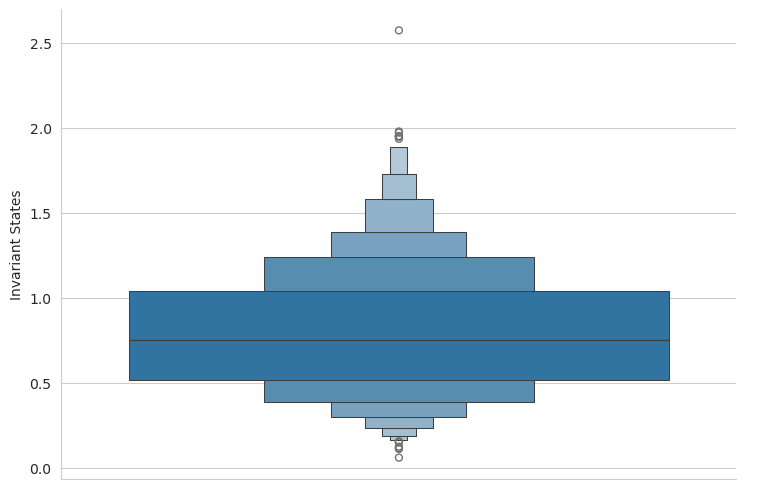

In [31]:
import pandas as pd

# Prepare data for plotting
data = {
    'Invariant States': [run.summary["Best_NRMSE"]['id_test']['inv']['invariant_states'] for run in runs]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Plot using seaborn's catplot
sns.catplot(data=df, y='Invariant States', kind='boxen', height=5, aspect=1.5)

In [1]:
import seaborn as sns
import pandas as pd
sns.set_theme()
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
import numpy as np

def plot_boxen(dataset_name: str, methods_dict, save_to: str=None, log_scale: bool=False, ylim=None):
    
    # Prepare data for plotting
    data = {
        'Invariant States': [],
        'Method': []
    }
    
    all_E_disFe = []
    for run in methods_dict['Ours']:
        all_E_disFe.append(run.summary["Best_inv_train_loss"]['E_disFe'])
    # Calculate the 90th percentile
    threshold = np.percentile(all_E_disFe, 90)
    
    methods_dict['Ours'] = [run for run in methods_dict['Ours'] if run.summary["Best_inv_train_loss"]['E_disFe'] < threshold]
    
    for method_name, method_runs in methods_dict.items():
        for run in method_runs:
            data['Invariant States'].append(run.summary["Best_NRMSE"]['id_test']['inv']['invariant_states'])
            data['Method'].append(method_name)
    plt.rcParams.update({
        'axes.titlesize': 14,  # Title font size
        'axes.labelsize': 14,  # Axis label font size
    })
    # Create a DataFrame
    df = pd.DataFrame(data)
    
    # Define a color palette for the methods
    palette = sns.color_palette("husl", n_colors=len(methods_dict))
    
    # Plot using seaborn's catplot
    g = sns.catplot(
        data=df, 
        y='Invariant States', 
        x='Method', 
        kind='boxen', 
        height=5, 
        aspect=1.2, 
        hue='Method',
        palette='pastel' # (e.g., 'viridis', 'coolwarm', 'Set2', 'pastel', 'tab10', etc.)
    )
    
    # Constrain the maximum y-axis value to 10
    # g.set(ylim=(0, 10))
    g.set_axis_labels('', 'NRMSE')  # Set x-axis title to empty, y-axis to "Invariant Error"
    g.set_xticklabels(fontsize=12)
    g.fig.suptitle(dataset_name, fontsize=16)  # Set the overall title and adjust its position
    if log_scale:
        g.set(yscale='log')
    if ylim:
        g.set(ylim=ylim)
    g.fig.tight_layout()
    
    if save_to:
        g.savefig(save_to, dpi=200)  # Set the desired DPI
    
    # Show the plot
    plt.show()

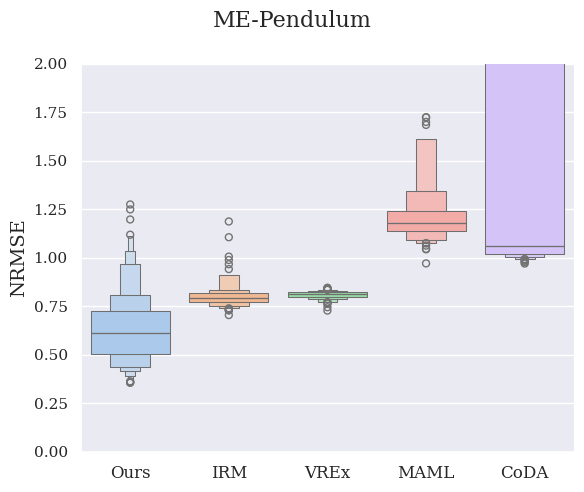

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import wandb
api = wandb.Api()

# Example: Suppose you have runs for multiple methods stored in a dictionary
# methods_dict = {'method_1': runs1, 'method_2': runs2, ...}
methods_dict = {
    # 'Ours': [run for run in api.sweep("dive-ci/Invariant_Phy/eac6i3hs").runs if run.state == "finished"], 
    'Ours': [run for run in api.sweep("dive-ci/Invariant_Phy/etbq8dzw").runs if run.state == "finished"], 
    # 'IRM': [run for run in api.sweep("dive-ci/Invariant_Phy/nnz6soo3").runs if run.state == "finished"],
    'IRM': [run for run in api.sweep("dive-ci/Invariant_Phy/frky48od").runs if run.state == "finished"],
    # 'VREx': [run for run in api.sweep("dive-ci/Invariant_Phy/u9krvk8e").runs if run.state == "finished"],
    'VREx': [run for run in api.sweep("dive-ci/Invariant_Phy/zup06uup").runs if run.state == "finished"],
    # 'MAML': [run for run in api.sweep("dive-ci/Invariant_Phy/s08chswp").runs if run.state == "finished"],
    'MAML': [run for run in api.sweep("dive-ci/Invariant_Phy/wup50nxg").runs if run.state == "finished"],
    # 'CoDA': [run for run in api.sweep("dive-ci/Invariant_Phy/3scjn8lq").runs if run.state == "finished"],
    'CoDA': [run for run in api.sweep("dive-ci/Invariant_Phy/c6kcj6n2").runs if run.state == "finished"],
    # Add more methods as needed
}

plot_boxen('ME-Pendulum', methods_dict, save_to="pendulum.png", ylim=(0, 2))

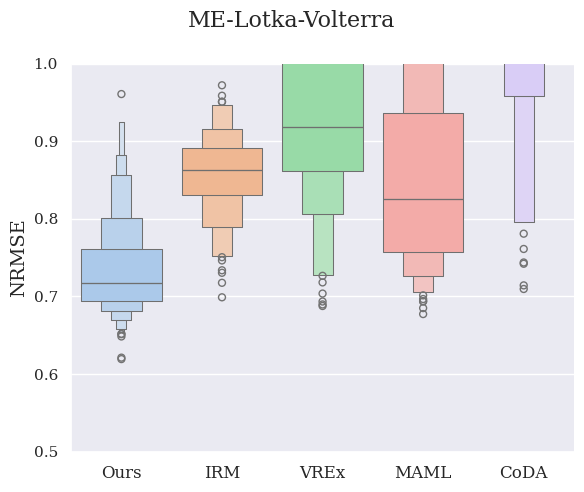

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import wandb
api = wandb.Api()

# Example: Suppose you have runs for multiple methods stored in a dictionary
# methods_dict = {'method_1': runs1, 'method_2': runs2, ...}
methods_dict = {
    # 'Ours': [run for run in api.sweep("dive-ci/Invariant_Phy/c4ky9v9g").runs if run.state == "finished"], 
    # 'Ours': [run for run in api.sweep("dive-ci/Invariant_Phy/clps7cai").runs if run.state == "finished"], 
    # 'IRM': [run for run in api.sweep("dive-ci/Invariant_Phy/4kfb9rf0").runs if run.state == "finished"],
    # 'VREx': [run for run in api.sweep("dive-ci/Invariant_Phy/b78x1hnd").runs if run.state == "finished"],
    # 'MAML': [run for run in api.sweep("dive-ci/Invariant_Phy/iaq8c689").runs if run.state == "finished"],
    # 'CoDA': [run for run in api.sweep("dive-ci/Invariant_Phy/l70r5ion").runs if run.state == "finished"],
    'Ours': [run for run in api.sweep("dive-ci/Invariant_Phy/7l2ncl5a").runs if run.state == "finished"], 
    'IRM': [run for run in api.sweep("dive-ci/Invariant_Phy/4118k761").runs if run.state == "finished"],
    'VREx': [run for run in api.sweep("dive-ci/Invariant_Phy/6umyy772").runs if run.state == "finished"],
    'MAML': [run for run in api.sweep("dive-ci/Invariant_Phy/62g2oug6").runs if run.state == "finished"],
    'CoDA': [run for run in api.sweep("dive-ci/Invariant_Phy/9y7chqp7").runs if run.state == "finished"],
    # Add more methods as needed
}
plot_boxen('ME-Lotka-Volterra', methods_dict, save_to="LV.png", ylim=(0.5, 1))

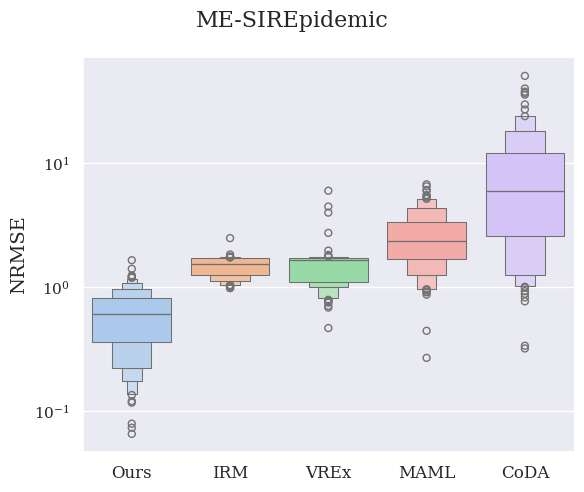

In [4]:
import wandb
api = wandb.Api()

# Example: Suppose you have runs for multiple methods stored in a dictionary
# methods_dict = {'method_1': runs1, 'method_2': runs2, ...}
methods_dict = {
    # 'Ours': [run for run in api.sweep("dive-ci/Invariant_Phy/8cnq0za9").runs if run.state == "finished"], 
    'Ours': [run for run in api.sweep("dive-ci/Invariant_Phy/mbl3h3t3").runs if run.state == "finished"], 
    'IRM': [run for run in api.sweep("dive-ci/Invariant_Phy/x4c7svpw").runs if run.state == "finished"],
    'VREx': [run for run in api.sweep("dive-ci/Invariant_Phy/5t15g49r").runs if run.state == "finished"],
    'MAML': [run for run in api.sweep("dive-ci/Invariant_Phy/zikqlikw").runs if run.state == "finished"],
    'CoDA': [run for run in api.sweep("dive-ci/Invariant_Phy/1qz61bm4").runs if run.state == "finished"],
    # Add more methods as needed
}

plot_boxen('ME-SIREpidemic', methods_dict, save_to="SIREpidemic.png", log_scale=True)

In [5]:
import os
os.getcwd()

'/data/shurui.gui/Projects/CEL'